In [171]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss

from tqdm import tqdm

I. FONCTIONS

In [172]:
def initialisation(n0, n1, n2):
    """
    :param n2: nombre de neurones de la couche 2
    :param n1: nombre de neurones de la couche 1
    :param n0: nombre d'entrées du réseau
    :return: W1, W2, b1, b2
    """
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)

    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }

    return parameters

In [173]:
def forward_propagation(X, parameters):
    """
    Ancien "model" qui devient ce qu'il est vraiment : "forward propagation"
    :param X:
    :param parameters:
    :return:
    """
    W1 = parameters['W1']
    b1 = parameters['b1']

    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1' : A1,
        'A2' : A2
    }

    return activations

In [174]:
def back_propagation(activations, parameters, X, y):
    """
    Ancien "gradients" qui devient ce qu'il est vraiment : "back propagation"
    :param activations: contient les probabilités selon la fonction sigmoïde pour chaque neurone
    :param X: dataset
    :param y: labels
    :return: les hyper-paramètres de chaque couche de neurones
    """
    A1 = activations['A1']
    A2 = activations['A2']

    W1 = parameters['W1']
    W2 = parameters['W2']

    # y a pour dimensions (nombre de données, 1) mais on travaillera avec les transposées d'où [1] et non [0]
    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    # on fait la somme selon l'axis = 1 [colonne] pour respecter les dimensions de la dérivée partielle de L selon b[2]
    # keepdims permet de garder un tableau à deux dimensions car la somme risquerait de transformer la matrice en vecteur

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'dW2' : dW2,
        'db1' : db1,
        'db2' : db2
    }

    return gradients

In [175]:
def update(gradients, parameters, learning_rate):
    dW1 = gradients['dW1']
    dW2 = gradients['dW2']

    W1 = parameters['W1']
    W2 = parameters['W2']

    db1 = gradients['db1']
    db2 = gradients['db2']

    b1 = parameters['b1']
    b2 = parameters['b2']

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2

    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }

    return parameters

In [176]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [177]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):

    n0 = X_train.shape[0]
    n2 = y_train.shape[0]

    parameters = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(activations, parameters, X_train, y_train)
        parameters = update(gradients, parameters, learning_rate)

        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))

            y_pred = predict(X_train, parameters)
            # Les tableaux de y_train et y_pred sont aux dimensions (n2, 1), ici on les formate pour avoir des vecteurs aux dimensions (n2,)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parameters

II. DATASET

dimensions de X: (2, 100)
dimensions de y: (1, 100)


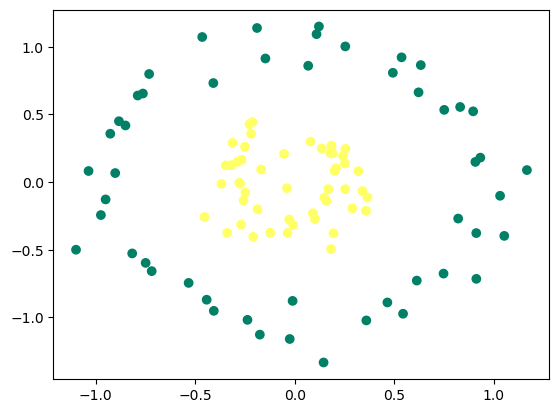

In [178]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4905.41it/s]


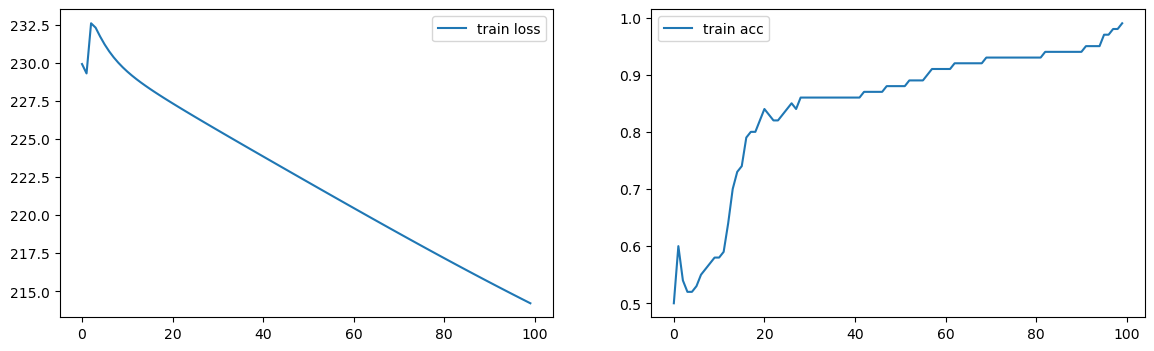

In [179]:
parameters = neural_network(X, y, n1=32)

III. CATS & DOGS V2

In [180]:
from utilities import *

In [181]:
X_train, y_train, X_test, y_test = load_data()

y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(- 1, X_train.shape[- 1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(- 1, X_test.shape[- 1]) / X_train.max()

In [182]:
print(X_train_reshape.shape)
print(X_test_reshape.shape)

print(y_train.shape)
print(y_test.shape)

(4096, 1000)
(4096, 200)
(1, 1000)
(1, 200)


In [183]:
X_train_reshape.shape

(4096, 1000)

In [184]:
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.01, n_iter = 1500):

    n0 = X_train.shape[0]
    n2 = y_train.shape[0]

    parameters = initialisation(n0, n1, n2)

    train_loss = []
    test_loss = []

    train_acc = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(activations, parameters, X_train, y_train)
        parameters = update(gradients, parameters, learning_rate)

        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parameters)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

            # Test
            activations2 = forward_propagation(X_test, parameters)
            test_loss.append(log_loss(y_test, activations2['A2']))
            y_pred = predict(X_test, parameters)
            test_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))

    # Premier graphique sur la "LOSS" avec la loss du training et test set
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Courbe de perte (Loss)')

    # Deuxième graphique avec l' "ACCURACY" du training et test set
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Courbe d\'exactitude (Accuracy)')
    plt.show()

    return parameters

100%|██████████| 12000/12000 [01:43<00:00, 115.66it/s]


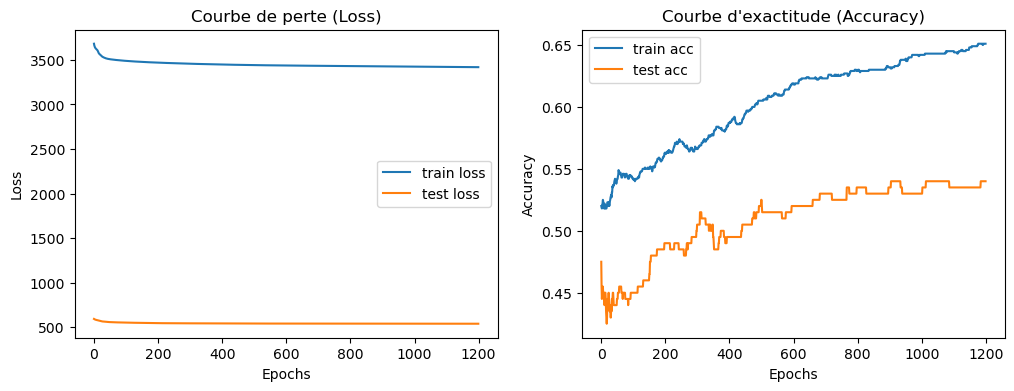

In [185]:
parameters2 = neural_network2(X_train_reshape, y_train, X_test_reshape, y_test, n1 = 32, learning_rate = 0.01, n_iter = 12000)